# Laboratorium 7 - Klasyfikacja, Regresja Logistyczna, SVM

Celem laboratorium jest praktyczna implementacja podstawowego algorytmu klasyfikacji: regresji logistycznej, oraz wykorzystanie gotowej implementacji maszyny wektorów nośnych (support vector machine - SVM). Zakładam, że zagadnienie klasyfikacji oraz podstawy teoretyczne regresji logistycznej oraz SVM są znane z wykładu.

Zacznijmy od importu bibliotek oraz wygenerowania przykładowego zbioru punktów:

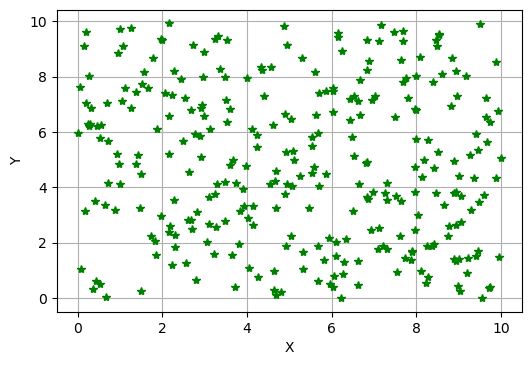

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.svm as svm

%matplotlib inline

np.random.seed(12345)

n_points = 300
X = np.random.rand(n_points, 2)*10

plt.figure(dpi=100)
plt.plot(X[:, 0], X[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podzielmy wygenerowane punkty na dwa zbiory dzielące go na klasy.
Niech pierwszy zbiór dzieli punkty na punkty powyżej prostej o równaniu y = x oraz poniżej tej prostej.

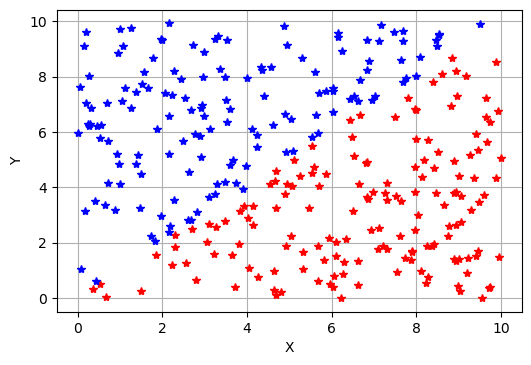

In [17]:
y1 = X[:, 1] > X[:, 0]

plt.figure(dpi=100)
plt.plot(X[:, 0][y1 == 0], X[:, 1][y1 == 0], "r*")
plt.plot(X[:, 0][y1 == 1], X[:, 1][y1 == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób dokonaliśmy podziału wygenerowanego zbioru na dwie klasy - klasy punktów niebieskich i czerwonych. Dokonaj analogicznego podziału w taki sposób, aby punkty leżące wewnątrz okręgu o środku w punkcie (5,5) i promieniu 2 należały do klasy niebieskiej, a punkty leżące na zewnątrz tego okręgu należały do klasy czerwonej.

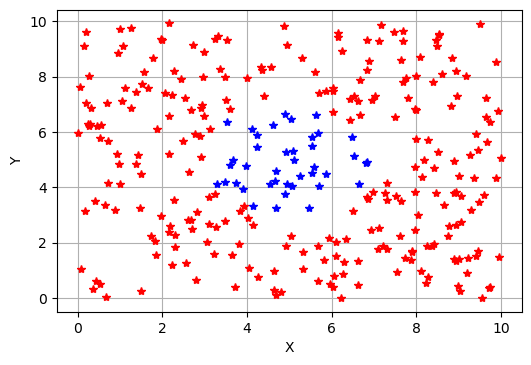

In [18]:
y2 = (abs(X[:, 1] - 5))**2 + (abs(X[:, 0] - 5))**2 < 4

plt.figure(dpi=100)
plt.plot(X[:, 0][y2 == 0], X[:, 1][y2 == 0], "r*")
plt.plot(X[:, 0][y2 == 1], X[:, 1][y2 == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób zostały wygenerowane dwa zbiory, na których będziemy dokonywać klasyfikacji, tj. próbować określić do której klasy należy nowo wygenerowany punkt.
W tym celu wygenerujmy nowy zbiór punktów, będący zbiorem testowym:

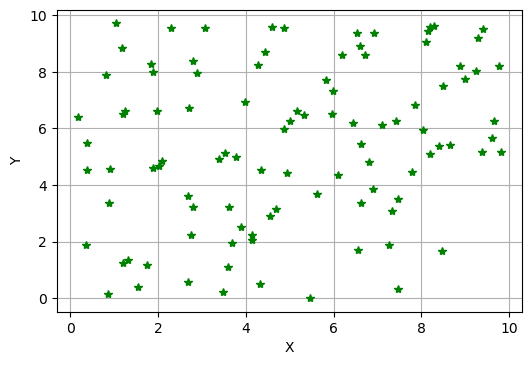

In [25]:
X_test = np.random.rand(100, 2)*10
plt.figure(dpi=100)
plt.plot(X_test[:, 0], X_test[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Zacznijmy od próby klasyfikacji zbioru testowego korzystajac z regresji logistycznej. Korzystając z funkcji dostępnej w bibliotece sklearn użyj regresji logistycznej, aby dokonać klasyfikacji wygenerowanego zbioru testowego zarówno dla podziału pierwszego (prosta odzielające) jak i podziału drugiego (wnętrze okręgu).

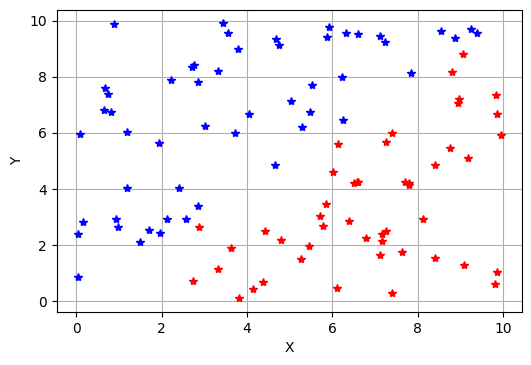

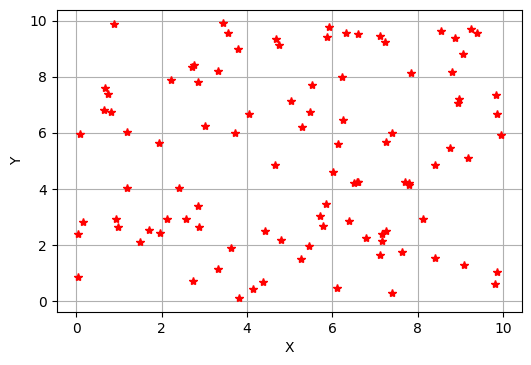

In [6]:
logisticRegr = lm.LogisticRegression()
x = [i[0] for i in X_test]
y = [i[1] for i in X_test]
logisticRegr.fit(X, y1)
prediction = logisticRegr.predict(X_test)
plt.figure(dpi=100)
plt.plot(X_test[:, 0][prediction], X_test[:, 1][prediction], "b*")
plt.plot(X_test[:, 0][prediction == False], X_test[:, 1][prediction == False], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

logisticRegr.fit(X, y2)
prediction = logisticRegr.predict(X_test)
plt.figure(dpi=100)
plt.plot(X_test[:, 0][prediction], X_test[:, 1][prediction], "b*")
plt.plot(X_test[:, 0][prediction == False], X_test[:, 1][prediction == False], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Wygląda na to, że klasyfikacja "działa" poprawnie dla podziału na klasy rozdzielone prostą, natomiast nie działa w ogóle dla okręgu. Dlaczego? Jak liczbowo ocenić jakość klasyfikacji? Zapoznaj się z pojęciem macierzy pomyłek, błędów I, II rodzaju, F1-Score. Zanim przejdziemy do poprawnej klasyfikacji dla okręgu, dokonaj samodzielnej implementacji regresji logistycznej operatej o metodę spadku gradientowego.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def loss(h, y):
    return ((-1) * y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression_ours(X, y, learning_rate=0.01, num_iters=100):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości  
    """
    theta = np.zeros(X.shape[1])
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
        print(loss(h, y))
    return theta
    

def classify(X, theta):
    return sigmoid(np.dot(X, theta))

Przykładowy rezultat:

0.6931471805599453
0.27439687098489696
0.5302503111753196
1.7096312302099743
1.6278462324937824
1.0979570351035235
0.5448571480117108
0.3452629139048808
0.34166214120103783
0.22304777463535033
0.23030585819336447
0.17203120831177865
0.17542418036374813
0.1441658867625895
0.1443699566103095
0.1259914537517387
0.12446619888492814
0.11333921257405127
0.11118632258572866
0.10449022376817509
0.10239770690813838
0.0984421403971914
0.0967361738082786
0.09443038977062564
0.09317506044583954
0.09181816547857347
0.09093554428892982
0.09009612618267933
0.08946666083652366
0.08889455571261984
0.08841475742239985
0.08797447805471106
0.0875752483175386
0.08719864524873183
0.08684129116468789
0.08649659888113383
0.08616217543649035
0.08583561108811473
0.08551572820275914
0.08520161722308127
0.08489275330247414
0.08458876076158285
0.08428938832967345
0.08399444520007021
0.08370378161530696
0.08341727011491543
0.08313479776717744
0.0828562605368499
0.08258156075028078
0.08231060538793088
Model coeffici

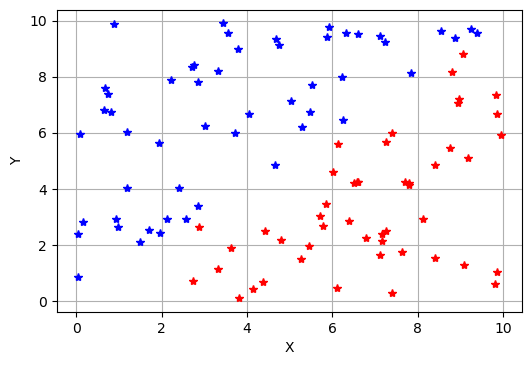

In [8]:
lr_own = logistic_regression_ours(X, y1, learning_rate=0.6, num_iters=50)
print("Model coefficients: ", lr_own)
result = classify(X_test, lr_own)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][result < 0.5], X_test[:, 1][result < 0.5], "r*")
plt.plot(X_test[:, 0][result > 0.5], X_test[:, 1][result > 0.5], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Wróćmy do problemu do klasyfikacji punktów wewnątrz / na zewnątrz okręgu. Regresja logistyczna nie jest w stanie bezpośrednio poradzić sobie z tym problemem (chociaż można dokonać transformacji danych w taki sposób, aby było to możliwe, np. poprzez transformacje do współrzędnych biegunowych). Spróbuj dokonać klasyfikacji korzystając z gotowej implemetnacji SVM w bibliotece sklearn (dobierz odpowiednie jądro i jego parametry). W jaki sposób jądro SVM wpływa na zdolność klasyfikacji? Jak wpływają na to poszczególne parametry? Dokonaj zagęszczenia zbioru testowego, aby zobaczyć dokładne punkty podziału.

Przykładowy rezultat:

C:\Users\PoiPon\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


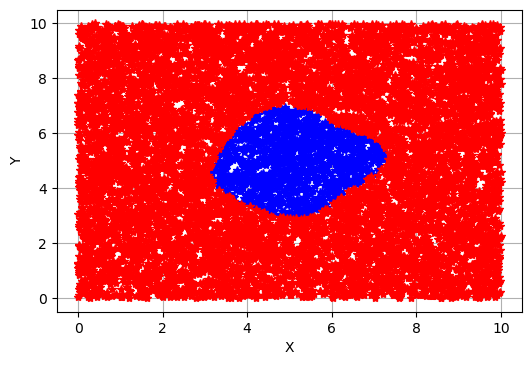

C:\Users\PoiPon\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


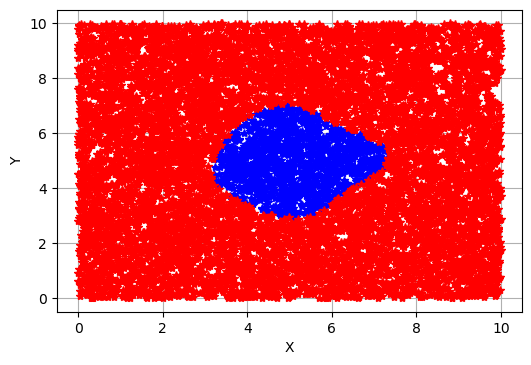

In [29]:
clf = svm.SVC()

clf.fit(X, y2)
pred = clf.predict(X_test)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][pred], X_test[:, 1][pred], "b*")
plt.plot(X_test[:, 0][pred == False], X_test[:, 1][pred == False], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


X_test = np.random.rand(10000, 2)*10

clf.fit(X, y2)
pred = clf.predict(X_test)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][pred], X_test[:, 1][pred], "b*")
plt.plot(X_test[:, 0][pred == False], X_test[:, 1][pred == False], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



SVM jest potężnym narzędziem do klasyfikacji dowolnych danych, szczególnie wielowymiarowych i liniowo nieseparowalnych. Obecnie jest najczęściej stosowany jako ostatnia warstwa decyzyjna w sieciach neuronowych z uwagi na jego zdolność do maksymalizacji marginesu błędu, co nie jest oczywiste np. dla warstw afinicznych w sieciach neuronowych (o czym pewnie będą zajęcia na kolejnych semestrach).